## Ratings

In [1]:
import pandas as pd

In [2]:
#reading the movies dataset

movies_df = pd.read_csv('../../dataset/MovieLens_files/movies_curated.csv')

movies_df = movies_df.drop('Unnamed: 0', axis=1)

movies_df.head()

movieId                         title    year  \
0        1                    Toy Story   1995.0   
1        2                      Jumanji   1995.0   
2        3             Grumpier Old Men   1995.0   
3        4            Waiting to Exhale   1995.0   
4        5  Father of the Bride Part II   1995.0   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [3]:
#reading the ratings dataset

ratings_df = pd.read_csv('../../dataset/MovieLens_files/ratings.csv')

ratings_df.head()

userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580

In [4]:
from datetime import datetime

print("Checking if timestamp is compatible with dataset:\n",datetime.fromtimestamp(0).strftime("%A, %B %d, %Y %I:%M:%S"))

Checking if timestamp is compatible with dataset:
 Thursday, January 01, 1970 01:00:00


In [5]:
#checking which movies had over 50 reviews

count_ratings_df = ratings_df.groupby('movieId').count()
count_ratings_df = count_ratings_df[count_ratings_df['rating']>50]
movies_id_list = count_ratings_df.index.to_list()

len(movies_id_list)

10473

In [6]:
movies_df = movies_df[movies_df['movieId'].isin(movies_id_list)]

movies_df.head()

movieId                         title    year  \
0        1                    Toy Story   1995.0   
1        2                      Jumanji   1995.0   
2        3             Grumpier Old Men   1995.0   
3        4            Waiting to Exhale   1995.0   
4        5  Father of the Bride Part II   1995.0   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [7]:
#ratings from movies with over 50 reviews

ratings_df = ratings_df[ratings_df['movieId'].isin(movies_id_list)]

ratings_df = ratings_df.reset_index()

In [8]:
#Tranforming timestamp column to datetime

#ratings_df['rating_mnth_year'] = 0

datetime.fromtimestamp(ratings_df['timestamp'][4]).strftime("%m - %Y")

ratings_df.head()

index  userId  movieId  rating   timestamp
0      0       1        2     3.5  1112486027
1      1       1       29     3.5  1112484676
2      2       1       32     3.5  1112484819
3      3       1       47     3.5  1112484727
4      4       1       50     3.5  1112484580

In [9]:
#Creating columns with the month and year when the review was made


timestamp_ratings = list(ratings_df['timestamp'])

ratings_df['yr-timestamp'] = [datetime.fromtimestamp(timestamp).strftime("%Y") for timestamp in timestamp_ratings]

ratings_df.head()

index  userId  movieId  rating   timestamp yr-timestamp
0      0       1        2     3.5  1112486027         2005
1      1       1       29     3.5  1112484676         2005
2      2       1       32     3.5  1112484819         2005
3      3       1       47     3.5  1112484727         2005
4      4       1       50     3.5  1112484580         2005

In [10]:
ratings_df

index  userId  movieId  rating   timestamp yr-timestamp
0                0       1        2     3.5  1112486027         2005
1                1       1       29     3.5  1112484676         2005
2                2       1       32     3.5  1112484819         2005
3                3       1       47     3.5  1112484727         2005
4                4       1       50     3.5  1112484580         2005
...            ...     ...      ...     ...         ...          ...
19845392  20000258  138493    68954     4.5  1258126920         2009
19845393  20000259  138493    69526     4.5  1259865108         2009
19845394  20000260  138493    69644     3.0  1260209457         2009
19845395  20000261  138493    70286     5.0  1258126944         2009
19845396  20000262  138493    71619     2.5  1255811136         2009

[19845397 rows x 6 columns]

In [83]:
ratings_df.groupby(['movieId','yr-timestamp']).mean()[['rating']]

rating
movieId yr-timestamp          
1       1996          4.132270
        1997          3.875424
        1998          3.885799
        1999          3.974688
        2000          4.142609
...                        ...
119145  2015          3.626582
119155  2014          2.360000
        2015          2.843750
120635  2015          2.824468
125916  2015          1.807292

[129930 rows x 1 columns]

In [103]:
ratings_df.groupby(['movieId','yr-timestamp']).mean()[['rating']].reset_index(level=[1]) 

yr-timestamp    rating
movieId                       
1               1996  4.132270
1               1997  3.875424
1               1998  3.885799
1               1999  3.974688
1               2000  4.142609
...              ...       ...
119145          2015  3.626582
119155          2014  2.360000
119155          2015  2.843750
120635          2015  2.824468
125916          2015  1.807292

[129930 rows x 2 columns]

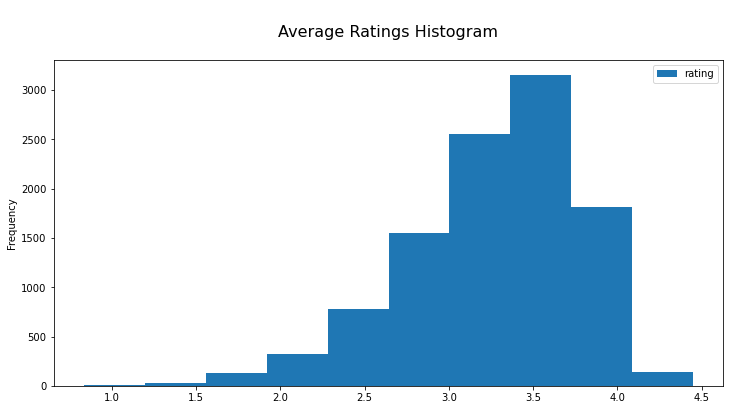

In [80]:
# Rating distribution

ratings_df.groupby('movieId').mean()[['rating']].plot.hist(figsize=(12,6))
plt.title("\nAverage Ratings Histogram\n",
            {"fontsize": 16})
plt.show()

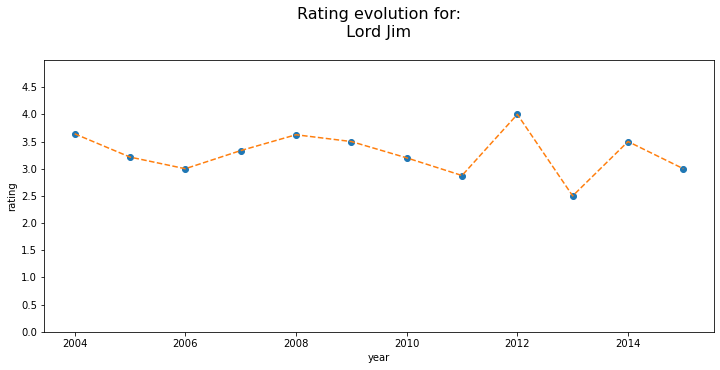

In [102]:
#Plotting the rating evolution for a random movie

import matplotlib.pyplot as plt
import random
import numpy as np

inp = random.choice(movies_id_list)

ratings_df.groupby(['movieId','yr-timestamp']).mean()['rating'][inp].plot(style='o', figsize=(12,5))
ratings_df.groupby(['movieId','yr-timestamp']).mean()['rating'][inp].plot(style='--', figsize=(12,5))
plt.title(f"Rating evolution for:\n {movies_df[movies_df['movieId']==inp]['title'][movies_df[movies_df['movieId']==inp]['title'].index[0]]}\n",
         {"fontsize": 16})
plt.ylim(0,5)
plt.ylabel('rating')
plt.xlabel('year')
plt.yticks(np.arange(0, 5, step=0.5))
plt.show()